In [4]:
# import necessary libraries and csv data file
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
import datetime as dt

def __iter__(self): return 0

bakery = pd.read_csv("BreadBasket_DMS.csv")
print(bakery.head())
item_count = bakery.Item.count()

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam


In [5]:
# Preliminary cleaning of dataset by removing NONE values
bakery = bakery.drop(bakery[bakery.Item == 'NONE'].index)
clean_item_count = bakery.Item.count()  
assert (int(item_count) - int(clean_item_count) == 21293 - 20507)
print(bakery.shape)
print(bakery.columns)
bakery.head()

(20507, 4)
Index(['Date', 'Time', 'Transaction', 'Item'], dtype='object')


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [6]:
# Transaction counts
bakery["Transaction"].value_counts()

6279    11
6716    11
6412    11
6474    11
6045    10
9447    10
9534     9
8835     9
3673     9
6290     9
3799     9
7245     9
6519     9
6730     8
7602     8
6056     8
8792     8
6048     8
9492     8
7397     8
7254     8
7803     8
7105     8
8011     8
5935     8
3529     8
6038     8
5807     8
6331     8
5562     8
        ..
952      1
2921     1
3001     1
968      1
5066     1
9164     1
7131     1
9196     1
1016     1
2937     1
872      1
8908     1
776      1
2777     1
6875     1
4842     1
6891     1
2809     1
4858     1
6907     1
2825     1
856      1
8988     1
808      1
2857     1
9004     1
4922     1
6971     1
6987     1
2049     1
Name: Transaction, Length: 9465, dtype: int64

In [7]:
# Listing the number of unique items sold and displaying the top 5 items sold
unique_item_count = len(bakery.Item.unique())
print("There are " + str(unique_item_count) + " unique items sold")
top_5 = bakery["Item"].value_counts().sort_values(ascending=False).head(5)
print(top_5)

There are 94 unique items sold
Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Item, dtype: int64


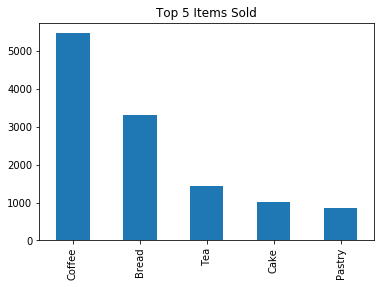

In [8]:
#Bar plot Visualization of top 5 items sold
top_5.plot.bar(y='Item', title='Top 5 Items Sold')

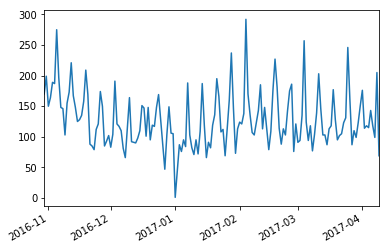

In [9]:
#Convert Date observations to datetime type and and plot total transactions per day
bakery.Date = pd.to_datetime(bakery.Date) 
bakery.Date.value_counts().plot()

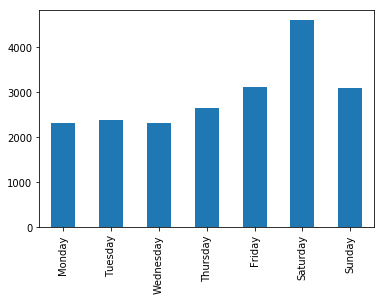

In [10]:
#Plot number of transactions for each weekday
bakery['Weekday'] = bakery.Date.dt.weekday_name
trans_by_weekday = bakery.Weekday.value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
trans_by_weekday.plot.bar()

In [11]:
# Small analysis to see earliest and latest sale
print(bakery.Time.max())
print(bakery.Time.min())
print(bakery.Time.mode())

23:38:41
01:21:05
0    12:07:39
dtype: object


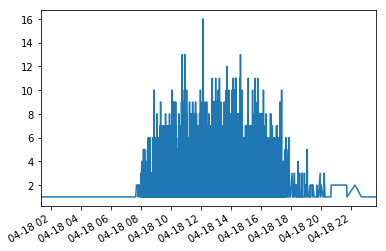

In [12]:
#looking at total sales for each hour
bakery.Time = pd.to_datetime(bakery.Time) 
bakery.Time.value_counts().plot()

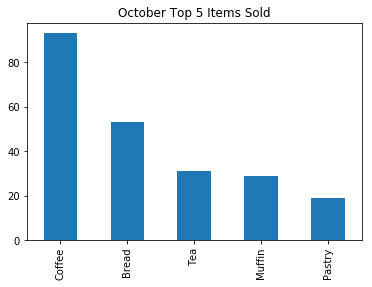

In [13]:
bakery['Date'] = pd.to_datetime(bakery['Date'])
bakery['Time'] = pd.to_datetime(bakery['Time'])
#October
octo = bakery[bakery['Date'].dt.month == 10]
octo_top_5 = octo["Item"].value_counts().sort_values(ascending=False).head(5)
octo_top_5.plot.bar(y='Item', title='October Top 5 Items Sold')

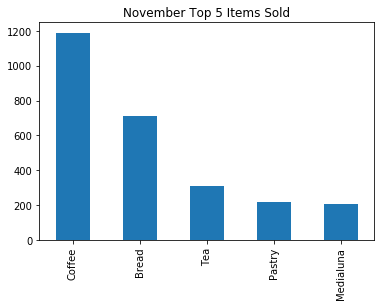

In [14]:
#November
nov = bakery[bakery['Date'].dt.month == 11]
nov_top_5 = nov["Item"].value_counts().sort_values(ascending=False).head(5)
nov_top_5.plot.bar(y='Item', title='November Top 5 Items Sold')

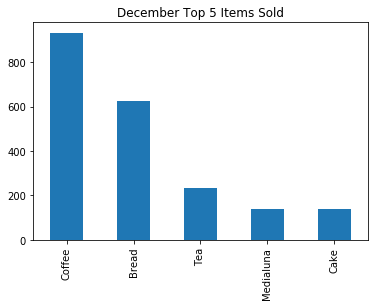

In [15]:
#December
dec = bakery[bakery['Date'].dt.month == 12]
dec_top_5 = dec["Item"].value_counts().sort_values(ascending=False).head(5)
dec_top_5.plot.bar(y='Item', title='December Top 5 Items Sold')

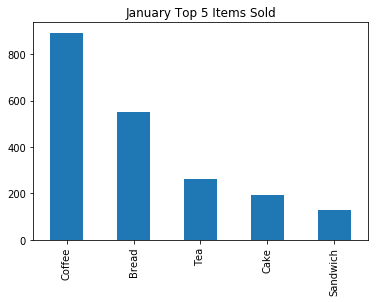

In [16]:
#January
jan = bakery[bakery['Date'].dt.month == 1]
jan_top_5 = jan["Item"].value_counts().sort_values(ascending=False).head(5)
jan_top_5.plot.bar(y='Item', title='January Top 5 Items Sold')

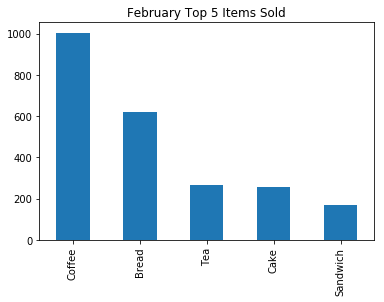

In [17]:
#February
feb = bakery[bakery['Date'].dt.month == 2]
feb_top_5 = feb["Item"].value_counts().sort_values(ascending=False).head(5)
feb_top_5.plot.bar(y='Item', title='February Top 5 Items Sold')

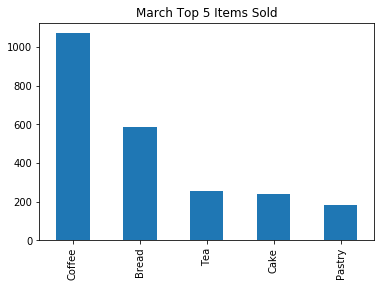

In [18]:
#March
mar = bakery[bakery['Date'].dt.month == 3]
mar_top_5 = mar["Item"].value_counts().sort_values(ascending=False).head(5)
mar_top_5.plot.bar(y='Item', title='March Top 5 Items Sold')

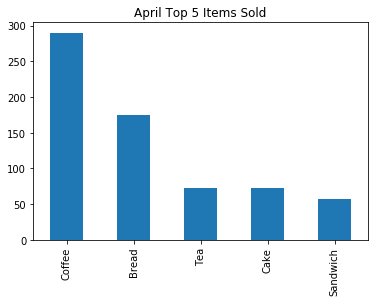

In [19]:
#April
apr = bakery[bakery['Date'].dt.month == 4]
apr_top_5 = apr["Item"].value_counts().sort_values(ascending=False).head(5)
apr_top_5.plot.bar(y='Item', title='April Top 5 Items Sold')

In [20]:
#timestamp = [dt.strptime(i,  '%H:%M:%S').time() for i in bakery['Time']]
hours = [x.hour for x in bakery['Time']]
def time_period(hour):
    if hour >= 1 and hour < 7:
        return 'Early Morning'
    elif hour >= 7 and hour < 11:
        return 'Morning'
    elif hour >= 11 and hour < 15:
        return 'Noon'
    elif hour >= 15 and hour < 20:
        return 'Afternoon'
    else:
        return 'Evening'
time = [time_period(y) for y in hours]
bakery['Time Period'] = time

bakery.head()



,Date,Time,Transaction,Item,Weekday,Time Period
0,2016-10-30,2020-04-18 09:58:11,1,Bread,Sunday,Morning
1,2016-10-30,2020-04-18 10:05:34,2,Scandinavian,Sunday,Morning
2,2016-10-30,2020-04-18 10:05:34,2,Scandinavian,Sunday,Morning
3,2016-10-30,2020-04-18 10:07:57,3,Hot chocolate,Sunday,Morning
4,2016-10-30,2020-04-18 10:07:57,3,Jam,Sunday,Morning


Total Number of Items sold:
1


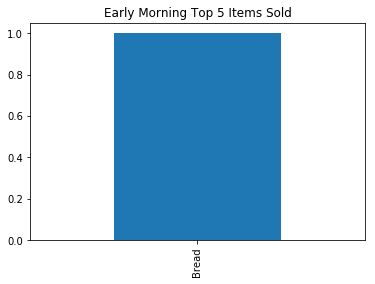

In [21]:
#sales from 1 am to 6:59 am
e_morning = bakery[bakery['Time Period'] == 'Early Morning']
e_morning_top_5 = e_morning["Item"].value_counts().sort_values(ascending=False).head(5)
e_morning_top_5.plot.bar(y='Item', title='Early Morning Top 5 Items Sold')

print("Total Number of Items sold:")
print(len(e_morning["Item"]))

#only one item is sold which is an outlier in the data. 

Total Number of Items sold:
5301


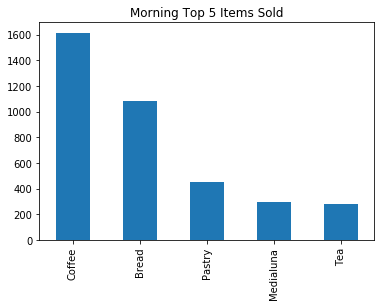

In [22]:
#sales from 7 am to 10:59 am
morning = bakery[bakery['Time Period'] == 'Morning']
morning_top_5 = morning["Item"].value_counts().sort_values(ascending=False).head(5)
morning_top_5.plot.bar(y='Item', title='Morning Top 5 Items Sold')

print("Total Number of Items sold:")
print(len(morning["Item"]))

Total Number of Items sold:
11213


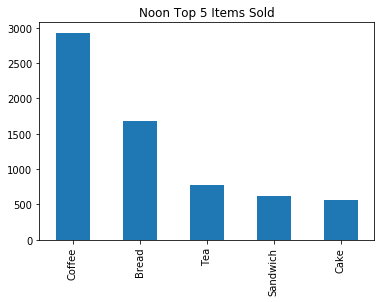

In [23]:
#sales from 11 am to 2:59 pm
noon = bakery[bakery['Time Period'] == 'Noon']
noon_top_5 = noon["Item"].value_counts().sort_values(ascending=False).head(5)
noon_top_5.plot.bar(y='Item', title='Noon Top 5 Items Sold')

print("Total Number of Items sold:")
print(len(noon["Item"]))

Total Number of Items sold:
3956


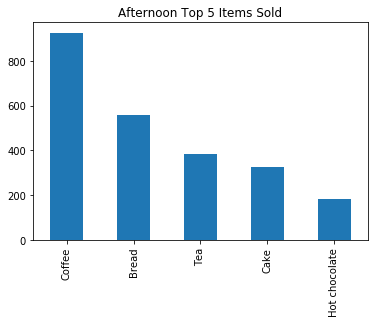

In [24]:
#sales from 3 pm to 7:59 pm
afternoon = bakery[bakery['Time Period'] == 'Afternoon']
afternoon_top_5 = afternoon["Item"].value_counts().sort_values(ascending=False).head(5)
afternoon_top_5.plot.bar(y='Item', title='Afternoon Top 5 Items Sold')

print("Total Number of Items sold:")
print(len(afternoon["Item"]))

Total Number of Items sold:
36


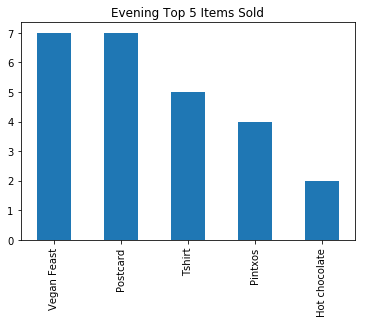

In [25]:
#sales from 8 pm to 12:59 am
evening = bakery[bakery['Time Period'] == 'Evening']
evening_top_5 = evening["Item"].value_counts().sort_values(ascending=False).head(5)
evening_top_5.plot.bar(y='Item', title='Evening Top 5 Items Sold')
print("Total Number of Items sold:")
print(len(evening["Item"]))

In [26]:
bakery_temp = bakery[bakery.groupby('Item')['Item'].transform('size') < 21]
print(bakery_temp.Item.unique())
print(bakery_temp.Item.value_counts())

['Basket' "Ella's Kitchen Pouches" 'Victorian Sponge' 'Pick and Mix Bowls'
 'Mighty Protein' 'Chicken sand' 'My-5 Fruit Shoot' 'Dulce de Leche'
 'Honey' 'The BART' 'Fairy Doors' 'Empanadas' 'Bowl Nic Pitt'
 'Bread Pudding' 'Adjustment' 'Chimichurri Oil' 'Bacon' 'Spread'
 'Kids biscuit' 'Siblings' 'Caramel bites' 'Olum & polenta' 'Polenta'
 'Hack the stack' 'Lemon and coconut' 'Crepes' 'Bare Popcorn' 'Muesli'
 'Crisps' 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Raspberry shortbread sandwich' 'Duck egg' "Valentine's card"
 'Vegan Feast' 'Postcard' 'Nomad bag' 'Chocolates' 'Coffee granules '
 'Drinking chocolate spoons ' 'Christmas common' 'Argentina Night'
 'Half slice Monster ' 'Gift voucher' 'Cherry me Dried fruit' 'Mortimer'
 'Raw bars' 'Tacos/Fajita']
My-5 Fruit Shoot                 18
Ella's Kitchen Pouches           17
Vegan Feast                      16
Crisps                           14
Dulce de Leche                   13
Valentine's card                 13